In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
data_1516 = pd.read_csv('./data/PL_player_1516.csv')
data_1617 = pd.read_csv('./data/PL_player_1617.csv')
data_1718 = pd.read_csv('./data/PL_player_1718.csv')
data_1819 = pd.read_csv('./data/PL_player_1819.csv')
data_1920 = pd.read_csv('./data/PL_player_1920.csv')
data_2021 = pd.read_csv('./data/PL_player_2021.csv')

## position class

In [3]:
def position_class(pos):
    position = list()
    for i in pos:
        if 'FW' in i:
            if ('AM' in i) or ('M' in i):
                position.append('AM/FW')
            else:
                position.append('FW')
        elif 'AM' in i:
            position.append('AM')
        elif 'M' in i:
            if 'D' in i:
                position.append('DM/WB')
            else :  position.append('M')
        elif 'D' in i:
            position.append('D')
        elif 'GK' in i:
            position.append('GK')
        else :
            position.append('??')
    return(position)

## 2021 season Premier League player ranking (FW, AM)

In [4]:
df = data_2021
df.position = position_class(df.position)
df['goal_assist'] = df['Goals'] + df['Assists']
df = df[df.position.isin(['AM', 'AM/FW', 'FW'])]
df = df.sort_values('position')
df_ = df[['player_name', 'position', 'goal_assist', 'Rating']]
df_.head()

,player_name,position,goal_assist,Rating
52,James Maddison,AM,13,7.00
213,Saïd Benrahma,AM,7,6.59
60,Matheus Pereira,AM,17,6.96
59,Jack Harrison,AM,16,6.96
58,Harvey Barnes,AM,13,6.98


In [5]:
def normalize(X):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X = X - np.mean(X, axis=0)
    return(X)

In [6]:
def get_score(X):
    pca = PCA()
    output = pca.fit_transform(X)
    return(output)

In [7]:
X = df_[['goal_assist', 'Rating']].values
X = normalize(X)
score = get_score(X)
df_[['norm_goal_assist','norm_Rating']] = X
df_[['score', 'score2']] = score

In [8]:
df_.head()

,player_name,position,goal_assist,Rating,norm_goal_assist,norm_Rating,score,score2
52,James Maddison,AM,13,7.00,0.086597,0.129825,0.154805,0.019725
213,Saïd Benrahma,AM,7,6.59,-0.075565,-0.117163,-0.138011,-0.019753
60,Matheus Pereira,AM,17,6.96,0.194705,0.105729,0.207486,-0.077705
59,Jack Harrison,AM,16,6.96,0.167678,0.105729,0.189767,-0.057297
58,Harvey Barnes,AM,13,6.98,0.086597,0.117777,0.145707,0.011827


In [9]:
u, s, vh = np.linalg.svd(np.dot(np.transpose(X), X))

In [10]:
y_ = np.arange(-1, 0.5, 0.1) * u[0,0]
x_ = np.arange(-1, 0.5, 0.1) * u[1,0]

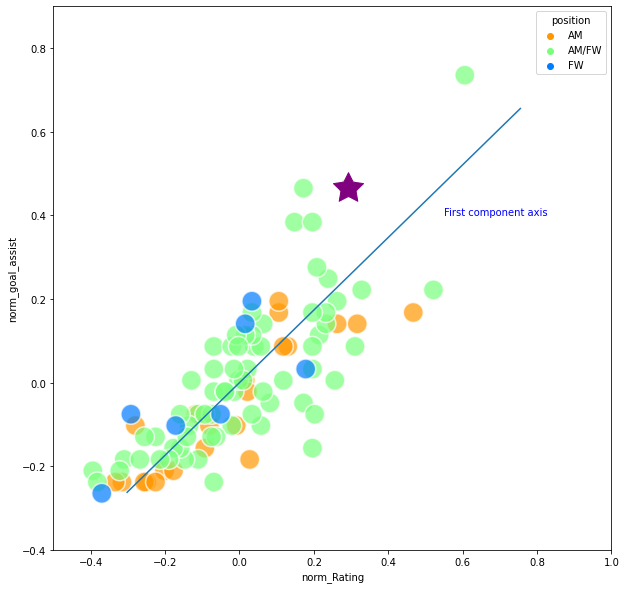

In [12]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(x='norm_Rating', y='norm_goal_assist', hue='position', palette = 'jet_r', 
                    data=df_.sort_values(by = 'position'), s=400, alpha=0.7)
temp = df_[df_['player_name'] == 'Son Heung-Min']
plt.scatter(temp['norm_Rating'], temp['norm_goal_assist'], marker=(5, 1), s=1000, color='purple')
plt.text(0.55, 0.4, 'First component axis', color = 'blue')
plt.xlim(-0.5, 1)
plt.ylim(-0.4, 0.9)
plt.plot(x_, y_)

(-0.2, 0.3)

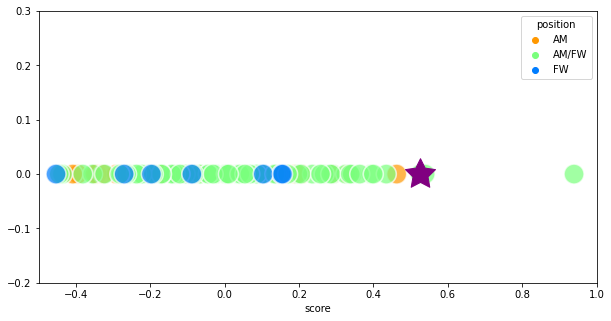

In [12]:
fig = plt.figure(figsize = (10,5))
sns.scatterplot(x='score', y=np.zeros(len(df_)), hue='position', palette = 'jet_r', 
                    data=df_.sort_values(by = 'position'), s=400, alpha=0.7)
temp = df_[df_['player_name'] == 'Son Heung-Min']
plt.scatter(temp['score'], 0, marker=(5, 1), s=1000, color='purple')
plt.xlim(-0.5, 1)
plt.ylim(-0.2, 0.3)
plt.savefig('./image_1.png', format='png')

In [13]:
df_.sort_values(by = 'score', ascending=False).head(10)

,player_name,position,goal_assist,Rating,norm_goal_assist,norm_Rating,score,score2
0,Harry Kane,AM/FW,37,7.79,0.735245,0.605729,0.939420,-0.158063
1,Kevin De Bruyne,AM/FW,18,7.65,0.221732,0.521392,0.539073,0.174399
11,Son Heung-Min,AM/FW,27,7.27,0.464975,0.292476,0.525691,-0.159353
2,Jack Grealish,AM,16,7.56,0.167678,0.467175,0.462695,0.179670
37,Mohamed Salah,AM/FW,27,7.07,0.464975,0.171994,0.434715,-0.238342
29,Jamie Vardy,AM/FW,24,7.11,0.383894,0.196090,0.399752,-0.161320
6,Sadio Mané,AM/FW,18,7.33,0.221732,0.328621,0.393511,0.048017
45,Patrick Bamford,AM/FW,24,7.03,0.383894,0.147898,0.363362,-0.192916
16,Ollie Watkins,AM/FW,19,7.18,0.248759,0.238259,0.342998,-0.031633
22,Marcus Rashford,AM/FW,20,7.13,0.275786,0.208139,0.337973,-0.071789


# Forward players ranking 

#### position : 'AM', 'AM/FW', 'D', 'DM/WB', 'FW', 'GK', 'M'

In [14]:
def player_ranking_table(df, position_list):
    df.position = position_class(df.position)
    df['goal_assist'] = df['Goals'] + df['Assists']
    df = df[df.position.isin(position_list)]
    
    X = df[['goal_assist', 'Rating']].values
    X = normalize(X)
    score = get_score(X)
    
    df[['norm_goal_assist','norm_Rating']] = X
    df[['score', 'score2']] = score
    df = df.sort_values('score', ascending = False)
    
    ranking = np.arange(1, len(df)+1)
    df['ranking'] = ranking
    return(df)

In [15]:
player_1516 = player_ranking_table(data_1516, ['FW', 'AM/FW', 'AM'])
player_1516.iloc[:,1:].head(8)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Clear,Drb,Blocks,OwnG,goal_assist,norm_goal_assist,norm_Rating,score,score2,ranking
0,Riyad Mahrez,14,Leicester,30,AM,36,3058,11,1.8,27.9,...,0.4,1.9,0.1,0,28,0.610719,0.607156,0.860864,0.022993,1
8,Jamie Vardy,14,Leicester,34,AM/FW,36,3140,6,1.3,17.4,...,0.2,0.5,0.1,0,30,0.679684,0.407156,0.773883,-0.169856,2
7,Harry Kane,30,Tottenham,28,AM/FW,38,3370,1,1.2,25.3,...,0.8,0.3,0.2,1,26,0.541753,0.419277,0.681818,-0.066435,3
1,Dimitri Payet,29,West Ham,34,AM/FW,29,2573,12,4.0,42.3,...,0.1,0.8,0.0,0,21,0.369339,0.546550,0.643635,0.144437,4
14,Sergio Agüero,167,Man City,33,AM/FW,29,2375,2,0.9,24.2,...,0.0,0.6,0.0,0,26,0.541753,0.334429,0.623625,-0.128183,5
2,Alexis Sánchez,13,Arsenal,32,AM/FW,28,2446,4,2.1,47.8,...,0.2,0.8,0.1,0,17,0.231408,0.534429,0.534943,0.230216,6
48,Romelu Lukaku,31,Everton,28,AM/FW,36,3177,6,1.4,29.7,...,0.1,0.2,0.1,0,24,0.472788,0.195035,0.477833,-0.182326,7
15,Dele Alli,30,Tottenham,25,AM/FW,28,2482,9,1.7,32.9,...,1.0,1.2,0.2,0,19,0.300374,0.310186,0.431336,0.019725,8


In [16]:
player_1617 = player_ranking_table(data_1617, ['FW', 'AM/FW', 'AM'])
player_1617.iloc[:,1:].head(8)

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Clear,Drb,Blocks,OwnG,goal_assist,norm_goal_assist,norm_Rating,score,score2,ranking
3,Harry Kane,30,Tottenham,28,AM/FW,29,2536,7,1.4,19.9,...,0.7,0.3,0.0,0,36,0.729076,0.540127,0.891187,-0.170515,1
1,Alexis Sánchez,13,Arsenal,32,AM/FW,36,3224,10,2.1,43.3,...,0.1,0.7,0.0,0,34,0.671933,0.591083,0.889968,-0.093962,2
9,Romelu Lukaku,31,Everton,28,AM/FW,36,3267,6,1.3,26.1,...,0.7,0.4,0.1,0,31,0.586218,0.425478,0.710080,-0.143075,3
0,Eden Hazard,15,Chelsea,30,AM/FW,36,3007,5,2.4,48.6,...,0.1,0.4,0.0,0,21,0.300504,0.622930,0.661816,0.200859,4
5,Kevin De Bruyne,167,Man City,30,AM/FW,33,2885,18,2.9,50.1,...,0.2,1.8,0.0,0,24,0.386218,0.457325,0.598042,0.025631,5
14,Diego Costa,15,Chelsea,33,FW,35,3090,7,1.2,29.5,...,1.1,0.5,0.1,0,27,0.471933,0.368153,0.590497,-0.097826,6
19,Dele Alli,30,Tottenham,25,AM/FW,35,3045,7,1.4,35.9,...,0.5,1.2,0.0,0,25,0.414790,0.329936,0.523678,-0.081673,7
13,Zlatan Ibrahimovic,32,Man Utd,40,FW,27,2437,5,1.7,37.3,...,0.8,0.5,0.0,0,22,0.329076,0.368153,0.493735,0.007271,8


In [17]:
player_1718 = player_ranking_table(data_1718, ['FW', 'AM/FW', 'AM'])
player_1819 = player_ranking_table(data_1819, ['FW', 'AM/FW', 'AM'])
player_1920 = player_ranking_table(data_1920, ['FW', 'AM/FW', 'AM'])
player_2021 = player_ranking_table(data_2021, ['FW', 'AM/FW', 'AM'])

In [18]:
ranking_1516 = player_1516[['player_name', 'ranking']]
ranking_1617 = player_1617[['player_name', 'ranking']]
ranking_1718 = player_1718[['player_name', 'ranking']]
ranking_1819 = player_1819[['player_name', 'ranking']]
ranking_1920 = player_1920[['player_name', 'ranking']]
ranking_2021 = player_2021[['player_name', 'ranking']]

In [19]:
ranking_df = pd.merge(ranking_2021, ranking_1920, 'outer', on = 'player_name')
ranking_df = pd.merge(ranking_df, ranking_1819, 'outer', on = 'player_name')
ranking_df = pd.merge(ranking_df, ranking_1718, 'outer', on = 'player_name')
ranking_df = pd.merge(ranking_df, ranking_1617, 'outer', on = 'player_name')
ranking_df = pd.merge(ranking_df, ranking_1516, 'outer', on = 'player_name')

In [20]:
ranking_df.columns = ['player_name', '2021', '1920', '1819', '1718', '1617', '1516']

In [87]:
top_player_list = []
for season in ranking_df.columns[1:]:
    top_player_list = top_player_list + ranking_df.sort_values(season)['player_name'][0:5].to_list()
top_player_list = list(set(top_player_list))
top_player_list = [i for i in top_player_list if i not in ['Romelu Lukaku', 'Alexis Sánchez', 
                                         'Dimitri Payet', 'Eden Hazard']]

top_player_list.append('Roberto Firmino')

In [89]:
dd = ranking_df.iloc[:, 1:].copy()

In [90]:
dd[dd > 25] = None

In [91]:
dd.iloc[1,:]

2021     2.0
1920     1.0
1819     NaN
1718     4.0
1617     5.0
1516    10.0
Name: 1, dtype: float64

In [92]:
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

In [100]:
top_player_list

['Riyad Mahrez',
 'Sadio Mané',
 'Son Heung-Min',
 'Harry Kane',
 'Kevin De Bruyne',
 'Marcus Rashford',
 'Sergio Agüero',
 'Jack Grealish',
 'Mohamed Salah',
 'Raheem Sterling',
 'Jamie Vardy',
 'Roberto Firmino']

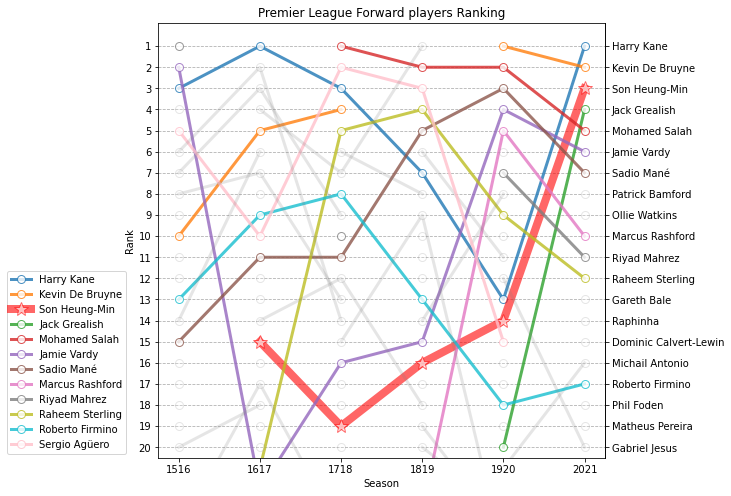

In [118]:
fig, ax1 = plt.subplots(figsize = (8,8))

with sns.color_palette('tab10_r', n_colors = 12):
    for i in range(len(ranking_df)):
        if ranking_df.player_name[i] == 'Son Heung-Min':
            ax1.plot(dd.iloc[i,:], "*-", markersize=15, mfc="w", linewidth = 8,
                    color = 'red', alpha = 0.6, label=ranking_df.player_name[i])
        elif ranking_df.player_name[i] == 'Sergio Agüero':
            ax1.plot(dd.iloc[i,:], "o-", markersize=8, mfc="w", linewidth = 3,
                    color = 'pink', alpha = 0.8, label=ranking_df.player_name[i])
        elif ranking_df.player_name[i] in top_player_list: 
            ax1.plot(dd.iloc[i,:], "o-", markersize=8, mfc="w", linewidth = 3,
                    alpha = 0.8, label=ranking_df.player_name[i])
        else:
            ax1.plot(dd.iloc[i,:], "o-", markersize=8, mfc="w", linewidth = 3, 
                     color = 'gray', alpha = 0.2)

ax1.set_title('Premier League Forward players Ranking')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.set_yticks(np.arange(1,21))
ax1.set_ylim(-0.1, 20.5)
ax1.invert_yaxis()
ax1.grid(axis='y', linestyle='--')
ax1.set_xlabel('Season')
ax1.set_ylabel('Rank')
lg = plt.legend(loc= 'center left', bbox_to_anchor = (-0.35, 0.22))
ax2 = ax1.secondary_yaxis("right")
ax2.yaxis.set_major_locator(FixedLocator(list(np.arange(1,21))))
ax2.yaxis.set_major_formatter(FixedFormatter(ranking_df["player_name"].to_list()))
plt.savefig('./Forward_player_rank.png', format='png',
            bbox_extra_artists=(lg, ax2,), bbox_inches='tight')